This notebook contains the study of a suicide rates dataset, disponibilized by great learning, at the Data Science Machine Learning MIT IDSS course.  

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the Dataset
df = pd.read_csv('master.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


First question:
# Is the suicide rate more prominent in some age categories than others?

* checking the suicide rates for every category

In [10]:
suicide_rates_df = df.groupby(['age'])['suicides_no'].sum().to_frame().sort_values('suicides_no', ascending=True).reset_index()
suicide_rates_df

,age,suicides_no
0,5-14 years,52264
1,75+ years,653118
2,15-24 years,808542
3,25-34 years,1123912
4,55-74 years,1658443
5,35-54 years,2452141


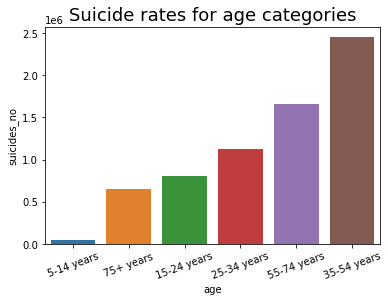

In [11]:
sns.barplot(data=suicide_rates_df, x='age', y='suicides_no')

plt.title('Suicide rates for age categories', size=18)
plt.xticks(rotation = 20)
plt.show()

Second question: 
# Which countries have the most and the least number of suicides?

In [5]:
# suicide number for each country
suicides_countries = df.groupby(['country'])['suicides_no'].sum().to_frame().sort_values('suicides_no').reset_index()
suicides_countries

,country,suicides_no
0,Dominica,0
1,Saint Kitts and Nevis,0
2,San Marino,4
3,Antigua and Barbuda,11
4,Maldives,20
...,...,...
96,Ukraine,319950
97,France,329127
98,Japan,806902
99,United States,1034013


In [6]:
most_suicides = suicides_countries['country'][suicides_countries['suicides_no'] == suicides_countries['suicides_no'].max()]
most_suicides = list(most_suicides.values)

least_suicides = suicides_countries['country'][suicides_countries['suicides_no'] == suicides_countries['suicides_no'].min()]
least_suicides = list(least_suicides.values)

print('The country with most suicides is: {}'.format(most_suicides[0]))
print('The country with least suicides is: {}'.format(least_suicides[0]))

The country with most suicides is: Russian Federation
The country with least suicides is: Dominica


Third Question:
# What is the effect of the population on suicide rates?

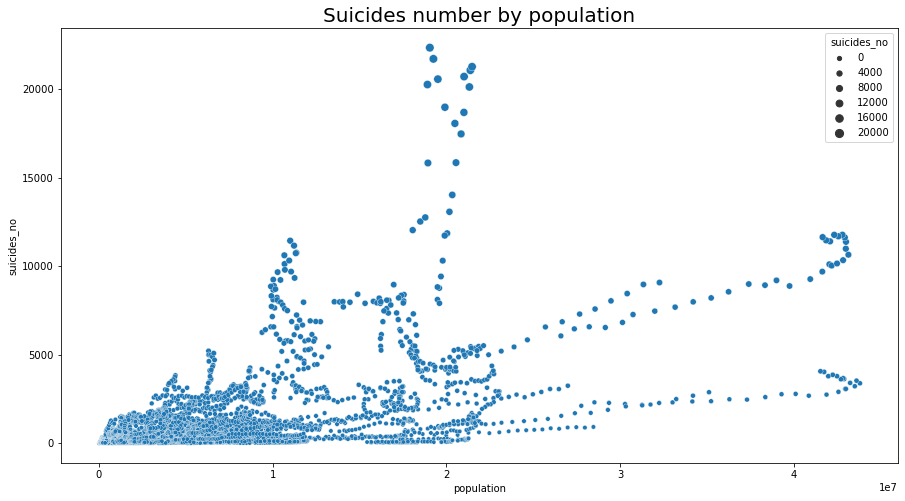

In [19]:
fig = plt.figure(figsize=(15,8))

sns.scatterplot(x='population',y='suicides_no', data=df, size="suicides_no") 

plt.title("Suicides number by population", size=20)

plt.show()

Fourth question:
# What is the effect of the GDP of a country on suicide rates?

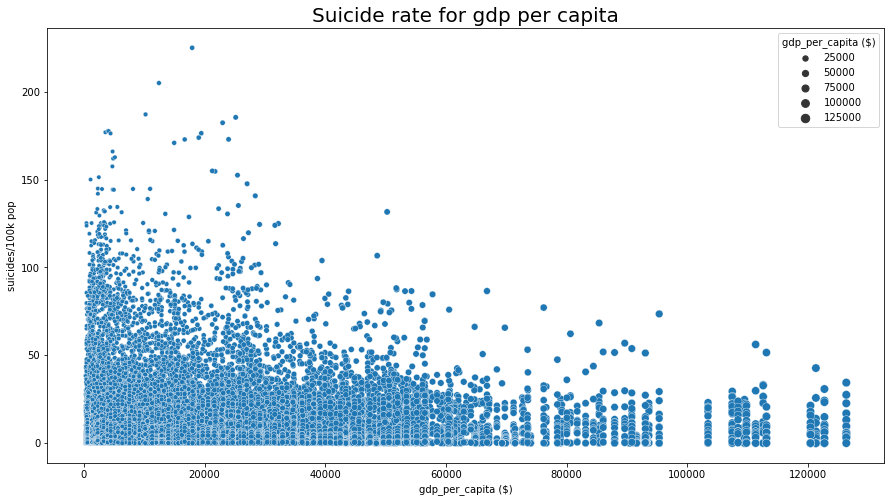

In [35]:
fig = plt.figure(figsize=(15,8))

sns.scatterplot(data=df, y='suicides/100k pop', x='gdp_per_capita ($)', size='gdp_per_capita ($)')

plt.title('Suicide rate for gdp per capita', size=20)

plt.show()

Fifth question:
# What is the trend of suicide rates across all the years?

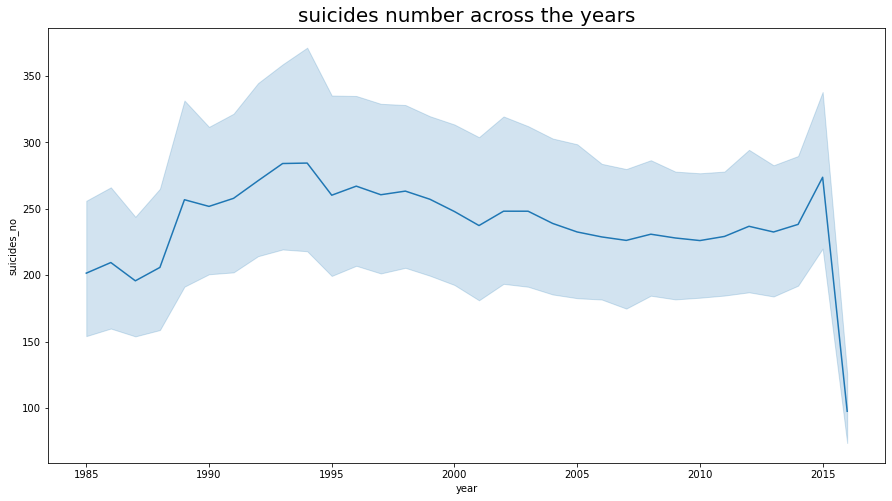

In [29]:
fig = plt.figure(figsize=(15,8))

sns.lineplot(data=df, y='suicides_no', x='year')

plt.title('suicides number across the years', size=20)

plt.show()

Sixth question:
# Is there a difference between the suicide rates of men and women?

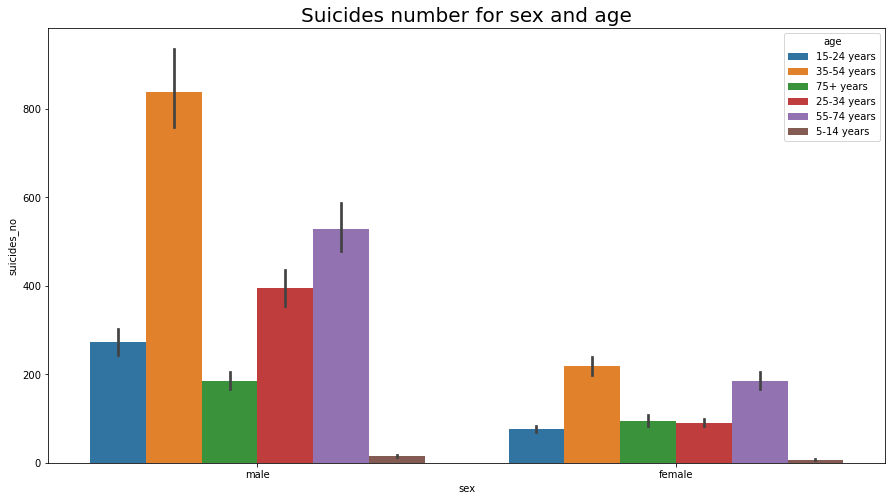

In [34]:
fig = plt.figure(figsize=(15,8))

sns.barplot(data=df, x='sex', y='suicides_no', hue='age')

plt.title('Suicides number for sex and age', size=20)

plt.show()